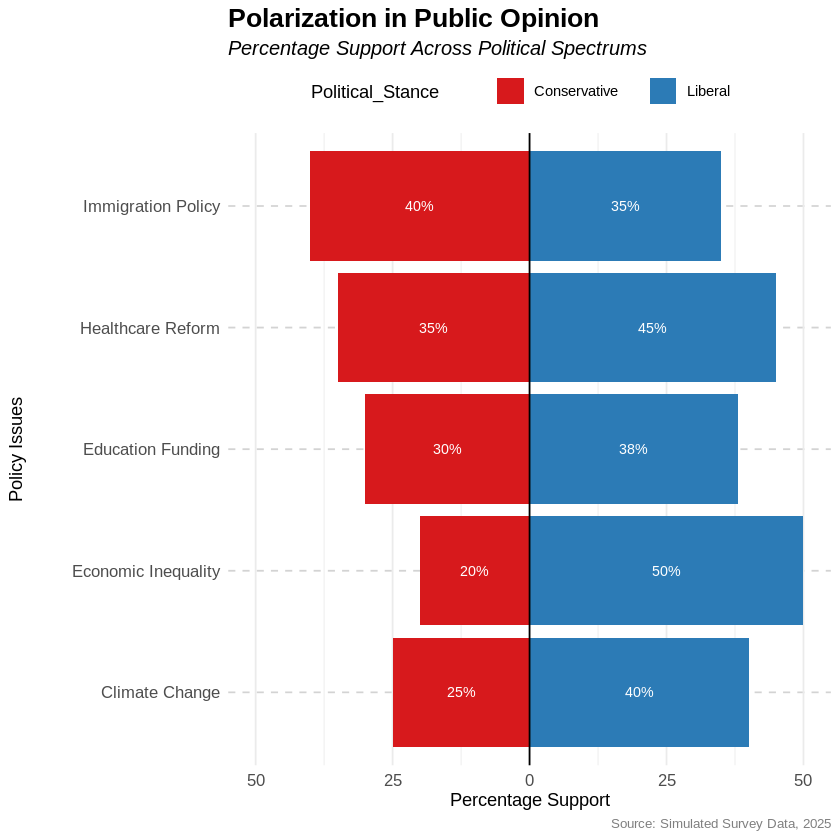

In [7]:
# Install and load required libraries
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(dplyr)) install.packages("dplyr")
library(ggplot2)
library(dplyr)

# Create survey data on political views
survey_data <- data.frame(
  Issue = c("Climate Change", "Healthcare Reform",
             "Immigration Policy", "Economic Inequality",
             "Education Funding"),
  Conservative = c(-25, -35, -40, -20, -30),
  Liberal = c(40, 45, 35, 50, 38)
)

# Reshape data for plotting
survey_data_long <- survey_data %>%
  tidyr::pivot_longer(
    cols = c(Conservative, Liberal),
    names_to = "Political_Stance",
    values_to = "Percentage"
  )

# Create a sophisticated diverging bar chart
ggplot(survey_data_long, aes(x = Issue, y = Percentage, fill = Political_Stance)) +
  geom_bar(stat = "identity", position = "identity") +

  # Add centered labels inside bars
  geom_text(aes(label = paste0(abs(Percentage), "%")),
            position = position_stack(vjust = 0.5),
            size = 3,
            color = "white") +

  scale_fill_manual(values = c("Conservative" = "#D7191C", "Liberal" = "#2C7BB6")) +
  coord_flip() +
  theme_minimal() +
  labs(
    title = "Polarization in Public Opinion",
    subtitle = "Percentage Support Across Political Spectrums",
    x = "Policy Issues",
    y = "Percentage Support",
    caption = "Source: Fake Data"
  ) +
  theme(
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(face = "italic", size = 12),
    plot.caption = element_text(color = "gray50", size = 8),
    legend.position = "top",
    panel.grid.major.y = element_line(color = "lightgray", linetype = "dashed"),
    axis.text = element_text(size = 10)
  ) +
  geom_hline(yintercept = 0, color = "black", linewidth = 0.5) +
  scale_y_continuous(
    limits = c(-50, 50),
    breaks = seq(-50, 50, by = 25),
    labels = abs
  )

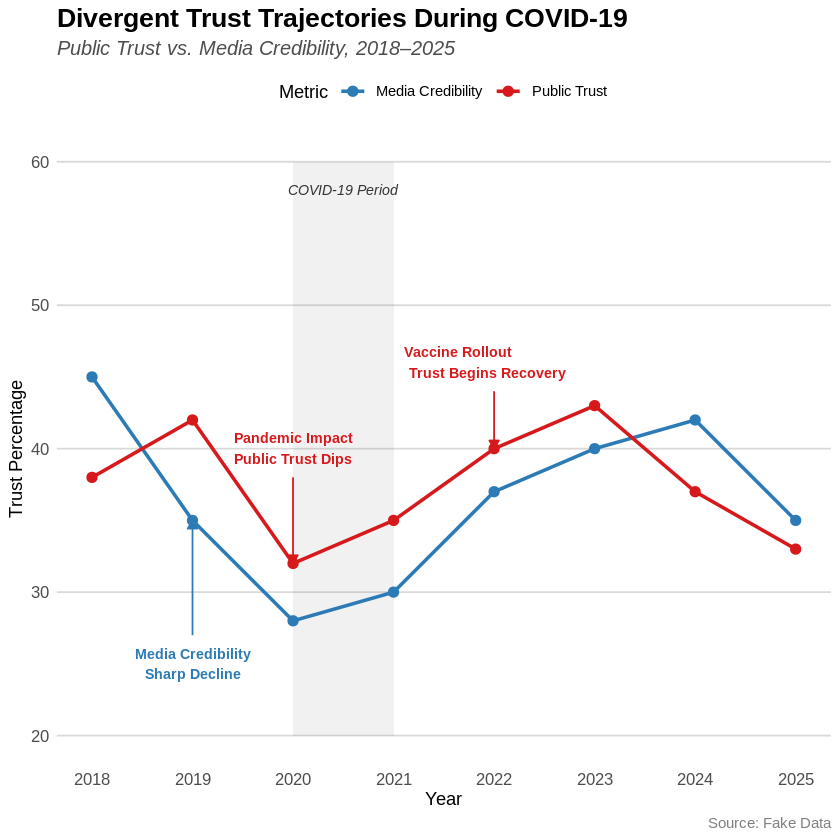

In [13]:
library(ggplot2)
library(dplyr)
library(grid)

# Create the data frame
trust_data <- tibble(
  Year = rep(2018:2025, each = 2),
  Metric = rep(c("Public Trust", "Media Credibility"), times = 8),
  Trust_Percentage = c(
    38, 45,
    42, 35,
    32, 28,
    35, 30,
    40, 37,
    43, 40,
    37, 42,
    33, 35
  )
)

ggplot(trust_data, aes(x = Year, y = Trust_Percentage, color = Metric, group = Metric)) +

  # COVID-19 Period Highlight
  annotate("rect", xmin = 2020, xmax = 2021,
           ymin = 20, ymax = 60,
           alpha = 0.08,
           fill = "gray30") +
  annotate("text", x = 2020.5, y = 58,
           label = "COVID-19 Period",
           color = "gray20",
           size = 3,
           fontface = "italic") +

  # Lines and points
  geom_line(size = 1) +
  geom_point(size = 2.5) +

  # Annotations for Public Trust
  annotate("text", x = 2020, y = 40,
           label = "Pandemic Impact\nPublic Trust Dips",
           color = "#D7191C",
           size = 3,
           fontface = "bold",
           hjust = 0.5) +
  annotate("segment", x = 2020, xend = 2020,
           y = 38, yend = 32,
           color = "#D7191C",
           arrow = arrow(type = "closed", length = unit(0.2, "cm"))) +

  annotate("text", x = 2021, y = 46,
           label = "Vaccine Rollout\nTrust Begins Recovery",
           color = "#D7191C",
           size = 3,
           fontface = "bold",
           hjust = -0.1) +
  annotate("segment", x = 2022, xend = 2022,
           y = 44, yend = 40,
           color = "#D7191C",
           arrow = arrow(type = "closed", length = unit(0.2, "cm"))) +

  # Annotations for Media Trust
  annotate("text", x = 2019, y = 25,
           label = "Media Credibility\nSharp Decline",
           color = "#2C7BB6",
           size = 3,
           fontface = "bold",
           hjust = 0.5) +
  annotate("segment", x = 2019, xend = 2019,
           y = 27, yend = 35,
           color = "#2C7BB6",
           arrow = arrow(type = "closed", length = unit(0.2, "cm"))) +

  # Labels, axes, theme
  labs(
    title = "Divergent Trust Trajectories During COVID-19",
    subtitle = "Public Trust vs. Media Credibility, 2018–2025",
    x = "Year",
    y = "Trust Percentage",
    caption = "Source: Fake Data"
  ) +
  scale_color_manual(values = c("Public Trust" = "#D7191C", "Media Credibility" = "#2C7BB6")) +
  scale_x_continuous(breaks = unique(trust_data$Year)) +
  scale_y_continuous(limits = c(20, 60), breaks = seq(20, 60, by = 10)) +
  theme_minimal(base_family = "Helvetica") +
  theme(
    plot.title = element_text(face = "bold", size = 16, color = "black"),
    plot.subtitle = element_text(face = "italic", size = 12, color = "gray30"),
    plot.caption = element_text(size = 9, color = "gray50", hjust = 1),
    axis.text = element_text(size = 10, color = "gray30"),
    axis.title = element_text(size = 11),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_line(color = "gray85"),
    legend.position = "top"
  )

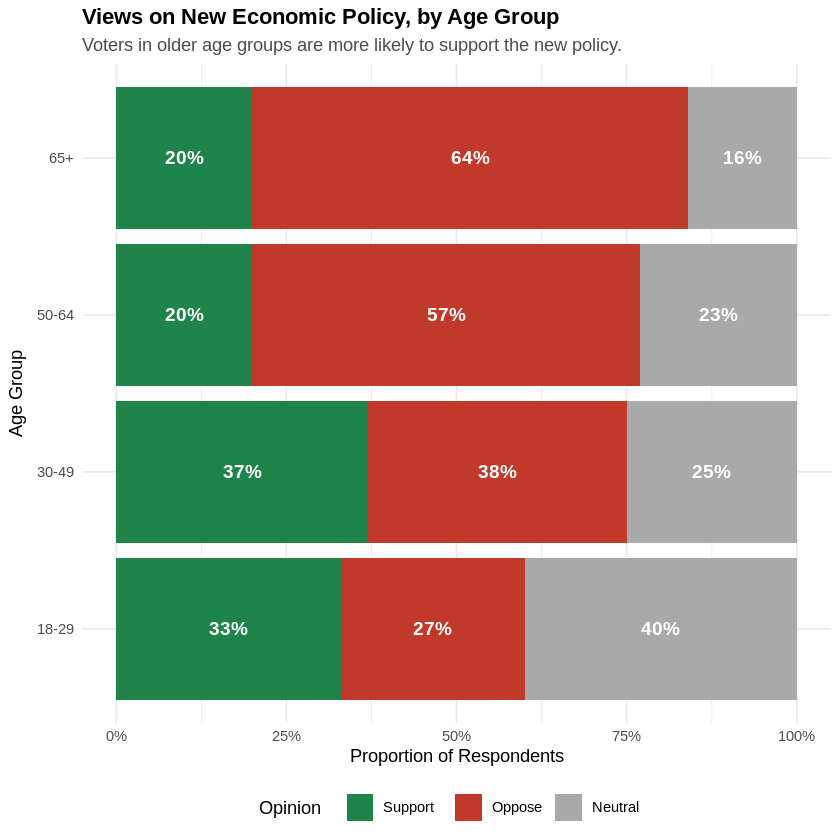

In [ ]:
library(tidyverse)

survey_data <- tibble(
  age_group = c(rep("18-29", 100), rep("30-49", 100), rep("50-64", 100), rep("65+", 100)),
  opinion = c(
    rep("Neutral", 40), rep("Oppose", 27), rep("Support", 33),      # 18-29
    rep("Neutral", 25), rep("Oppose", 38), rep("Support", 37),      # 30-49
    rep("Neutral", 23), rep("Oppose", 57), rep("Support", 20),      # 50-64
    rep("Neutral", 16), rep("Oppose", 64), rep("Support", 20)       # 65+
  )
)

# Convert age_group and opinion to a factor with specific orders
survey_data$age_group <- factor(survey_data$age_group, levels = c("18-29", "30-49", "50-64", "65+"))
survey_data$opinion <- factor(survey_data$opinion, levels = c("Neutral", "Oppose", "Support"))

# Correct the stacking order and label positions
plot_data <- survey_data %>%
  group_by(age_group, opinion) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(age_group) %>%
  # Arrange according to the fill order in the plot
  arrange(factor(opinion, levels = c("Support", "Oppose", "Neutral"))) %>%
  mutate(
    proportion = count / sum(count),
    x_position = cumsum(proportion) - 0.5 * proportion
  )

# Plot
ggplot(plot_data, aes(y = age_group, x = proportion, fill = opinion)) +
  geom_bar(stat = "identity") +
  geom_text(aes(x = x_position, label = scales::percent(proportion, accuracy = 1)),
            size = 4, color = "white", fontface = "bold") +
  scale_x_continuous(labels = scales::percent) +
  labs(
    title = "Views on New Economic Policy, by Age Group",
    subtitle = "Voters in older age groups are more likely to oppose the new policy.",
    y = "Age Group",
    x = "Proportion of Respondents",
    fill = "Opinion"
  ) +
  scale_fill_manual(
    values = c("Support" = "#1E8449", "Oppose" = "#C0392B", "Neutral" = "DarkGray"),
    breaks = c("Support", "Oppose", "Neutral")
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(color = "gray30"),
    legend.position = "bottom"
  )